In [1]:
import pandas as pd
from das_fk.utils import read_PASSCAL_segy, downsample_das
from das_fk.visualization import show_data

# Download data

In [2]:
# from 
# !pip3 install awscli


In [3]:
# download locations csv
# !cd ../data && aws s3 cp --no-sign-request s3://scedc-pds/Ridgecrest_DAS/das_info.csv .

In [4]:
# lets download a single file
# !cd ../data && aws s3 cp --no-sign-request s3://scedc-pds/Ridgecrest_DAS/SEG-Y/hourly/2020062417.segy .

# Channel positions

In [5]:
location = pd.read_csv("../data/das_info.csv")
location.head()

,index,latitude,longitude,elevation_m
0,25,35.645200,-117.667931,0.0
1,26,35.645272,-117.667929,0.0
2,27,35.645344,-117.667928,0.0
3,28,35.645416,-117.667927,0.0
4,29,35.645488,-117.667926,0.0


<Axes: >

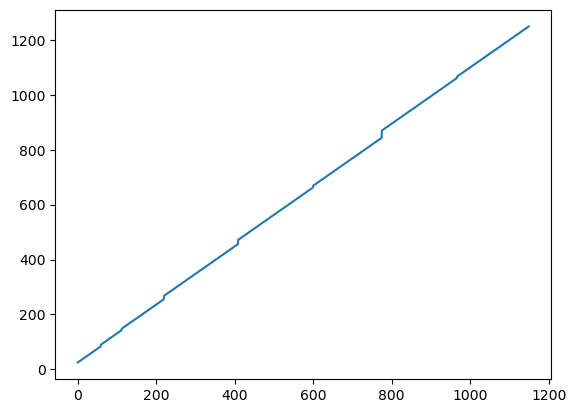

In [6]:
location["index"].plot()

<Axes: xlabel='index', ylabel='elevation_m'>

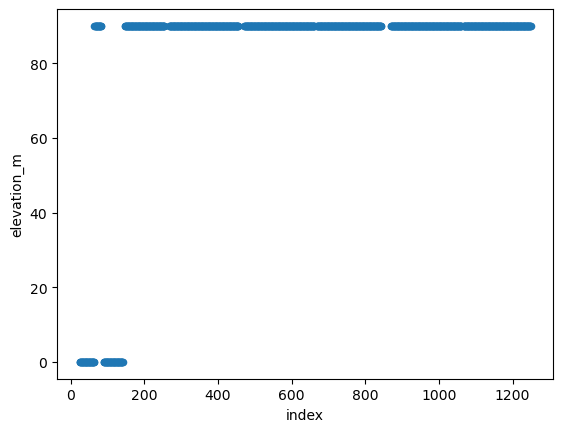

In [7]:
location.plot.scatter("index", "elevation_m")

<Axes: xlabel='latitude', ylabel='longitude'>

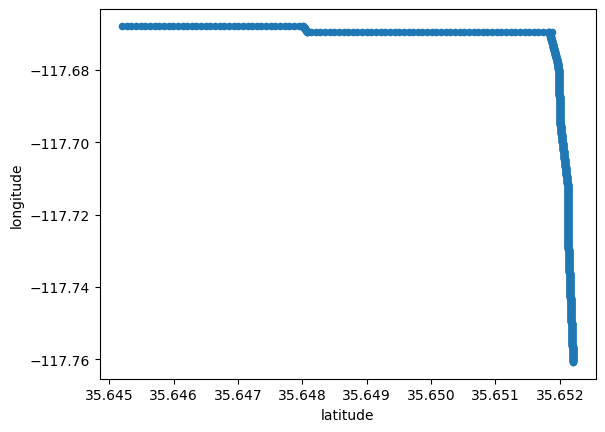

In [8]:
location.plot.scatter("latitude", "longitude")

<Axes: xlabel='index'>

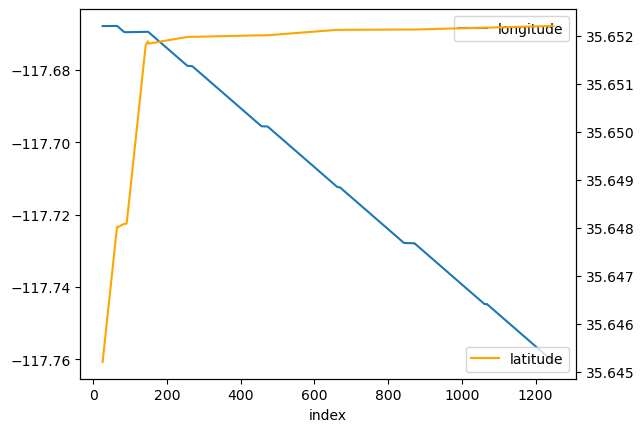

In [9]:
ax = location.plot("index", "longitude")

twin_ax =ax.twinx()
location.plot("index", "latitude", ax=twin_ax, c='orange')

In [10]:
location_new = location[120:]

<Axes: xlabel='index'>

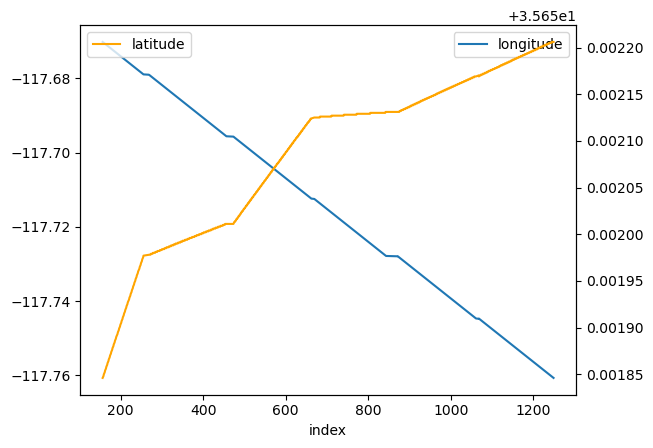

In [11]:
ax = location_new.plot("index", "longitude")

twin_ax =ax.twinx()
location_new.plot("index", "latitude", ax=twin_ax, c='orange')

# Preprocess

In [12]:
channel_index = location_new["index"].to_numpy()
channel_lat = location_new["latitude"].to_numpy()
channel_lon = location_new["longitude"].to_numpy()

In [13]:
data, das_time = read_PASSCAL_segy("../data/2020062417.segy")

In [14]:
# Option 1: Downsample the data.
strain, das_time = downsample_das(data[channel_index, :], das_time, fd=10)
strain.shape

# Option 2: Don't downsample
# strain = data[channel_index, :]

# Option 3: Don't downsample and keep all channels
# strain = data

(1030, 360000)

In [15]:
# Highpass filter
from scipy.signal import butter, sosfiltfilt

dt = das_time[1] - das_time[0] # (it is constant)
sos = butter(4, 0.5*2*dt, output='sos', btype='high')
strain_filt = sosfiltfilt(sos, strain, axis=1)

# Median filter
# For salt and pepper noise, outliers and bad channels.
from scipy.signal import medfilt2d

strain_prep = medfilt2d(strain_filt, kernel_size=(5,1))

# Visualize

Text(0.5, 1.0, 'High-passed Strain')

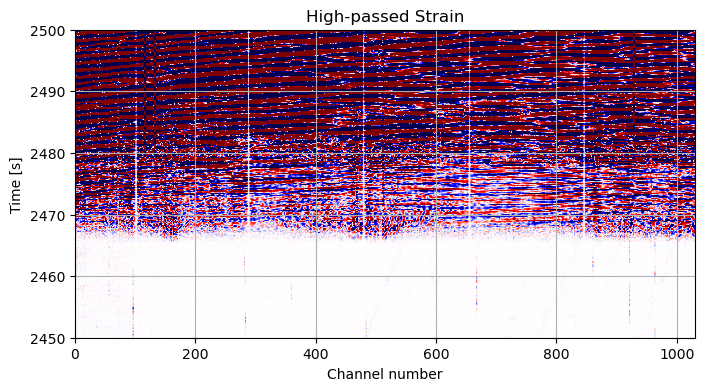

In [16]:
fig, ax2 = show_data(strain_prep, das_time, pclip=98)
ax2.set_ylim(2450, 2500)
ax2.set_title('High-passed & median filtered Strain')